# This notebook will be used for the Coursera Capstone 


In [98]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Introduction: Business Problem for the Project

In today's world, we travel atleast once a day to reach a certain destination, be it a school,college,office or anywhere. This shows how regularly people commute to differnet places. Though there are many rules and protocols to be followed while travelling on a road, there are always some accidents. These accidents have a serious impact on people's lives. 

Hence, using different Data Science techniques on the data available, we can analyse the accidents and predict the severity of each accident in a such a way that necessary precautions can be taken by the City Road Department and the common folk.

The main focus of this project is to predict the severity of an road accident. The predictions and results gained through this capstone project can be used by the Government in order to find out ways to keep the number of accidents to the minimum. Hence, a clear, accurate and detailed analysis will be the goal of my project.




# Understanding the Data Invloved

The Dataset being used in this project is from the Seattle Traffic Department, which is based on the collisons occured in the city of Seattle. 

The Data is recorded from 2004 to May-2020

The Dataset includes 194,673 samples and 37 attributes

The attributes included are Severity of collision, Weather Condition, No. of People involved, Road Condition, Location, Report number etc.

There are also many empty entries in the Dataset.

In the next phase of the project, which is Data Cleaning, all the irrelevant data columns will be dropped and the relevant ones will be modified in way that would benefit the model.

### Downloading and Loading the Data

We download the dataset to our project directory and take a look at the data types and the dimensionality of the data. We can see that the dataset contains 221,389 records and 40 fields.

The metadata of the dataset can be found from the website of the [Seattle Department of Transportation](https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf). On reading the dataset summary, we can determine the description of each of the fields and their possible values.

In [99]:
!wget -O data.csv "https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv"

/bin/sh: wget: command not found


In [100]:
data = pd.read_csv("/Users/eknathreddy/Desktop/Data-Collisions.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

The data contains several categorical fields and corresponding descriptions which could help us in further analysis. We make an attempt at understanding the data in terms of the fields that we shall take into account for later stages of model building.

The `X` and `Y` fields denote the longitude and latitude of the collisions. We can visualize the first few non-null collisions on a map.

In [101]:
map = folium.Map(location=[47.60, -122.33], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map)
locations = data[['Y', 'X']][data['Y'].notna()].head(1000)
locationlist = locations.values.tolist()
for point in range(len(locations)):
    folium.Marker(locationlist[point]).add_to(marker_cluster)
map

The `WEATHER` field contains a description of the weather conditions during
the time of the collision. 

In [102]:
data['WEATHER'].value_counts().to_frame('count')

,count
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


The `ROADCOND` field describes the condition of the road during the collision. 

In [103]:
data['ROADCOND'].value_counts().to_frame('count')

,count
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


The `LIGHTCOND` field describes the light conditions during the collision.

In [104]:
data['LIGHTCOND'].value_counts().to_frame('count')

,count
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


The `SPEEDING` field classifies collisions based on whether or not speeding was a factor in the collision. Blanks indicate cases where the vehicle was not speeding.

In [105]:
data['SPEEDING'].value_counts().to_frame()

,SPEEDING
Y,9333


The `SEVERITYCODE` field contains a code that corresponds to the severity of the
collision. and `SEVERITYDESC` contains a detailed description of the severity of the collision.

We can conclude that there were 349 collisions that resulted in at least one fatality, and 3,102 collisions that resulted in serious injuries. The following table lists the meaning of each of the codes used in the `SEVERITYCODE` field:

| SEVERITYCODE Value | Meaning |
| :-: | --- |
| 1 | Accidents resulting in property damage |
| 2 | Accidents resulting in injuries |
| 2b | Accidents resulting in serious injuries |
| 3 | Accidents resulting in fatalities |
| 0 | Data Unavailable i.e. Blanks |

In [106]:
data['SEVERITYCODE'].value_counts().to_frame('count')

,count
1,136485
2,58188


The `UNDERINFL` field describes whether or not a driver involved was under the
influence of drugs or alcohol. The values `0` and `N` denote that the driver was not under any influence while `1` and `Y` that they were.

In [107]:
data['UNDERINFL'].value_counts().to_frame('count')

,count
N,100274
0,80394
Y,5126
1,3995


The `PERSONCOUNT` and `VEHCOUNT` indicate how many people and vehicles were involved in a collision respectively.

In [108]:
data['PERSONCOUNT'].describe()

count    194673.000000
mean          2.444427
std           1.345929
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          81.000000
Name: PERSONCOUNT, dtype: float64

In [109]:
data['VEHCOUNT'].describe()

count    194673.000000
mean          1.920780
std           0.631047
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          12.000000
Name: VEHCOUNT, dtype: float64

In [110]:
data['PEDCOUNT'].describe()

count    194673.000000
mean          0.037139
std           0.198150
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: PEDCOUNT, dtype: float64

In [111]:
data['PEDCYLCOUNT'].describe()

count    194673.000000
mean          0.028391
std           0.167413
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: PEDCYLCOUNT, dtype: float64

As the dataset has possibly been sourced from a database table, several unique identifiers and spatial features are present in the database which may be irrelevant in further statistical analysis. These fields are `OBJECTID`, `INCKEY`, `COLDETKEY`, `INTKEY`, `SEGLANEKEY`, `CROSSWALKKEY`, and `REPORTNO`. Other fields suchs as `EXCEPTRSNCODE`, `SDOT_COLCODE`, `SDOTCOLNUM` and `LOCATION` and their corresponding descriptions (if any) are categorical but have a large number of distinct values that shall not be that much useful for analysis. The `INCDATE` and `INCDTTM` denote the date and the time of the incident but may not be of use in further analyses. The data needs to be pre-processed.

### Data Pre-processing

Checking for blanks and duplicated records.

In [112]:
data.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [113]:
data.duplicated().sum()

0

Selecting relevant fields and dropping others.

In [114]:
data_clean = data[['X', 'Y', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
                   'SPEEDING', 'SEVERITYCODE', 'UNDERINFL',
                   'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   X             189339 non-null  float64
 1   Y             189339 non-null  float64
 2   WEATHER       189592 non-null  object 
 3   ROADCOND      189661 non-null  object 
 4   LIGHTCOND     189503 non-null  object 
 5   SPEEDING      9333 non-null    object 
 6   SEVERITYCODE  194673 non-null  int64  
 7   UNDERINFL     189789 non-null  object 
 8   PERSONCOUNT   194673 non-null  int64  
 9   PEDCOUNT      194673 non-null  int64  
 10  PEDCYLCOUNT   194673 non-null  int64  
 11  VEHCOUNT      194673 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 17.8+ MB


Fixing the `SPEEDING` field by encoding it to `0` for the blanks and `1` for the `Y` values.

In [115]:
data_clean['SPEEDING'] = data_clean['SPEEDING'].map({'Y': 1})
data_clean['SPEEDING'].replace(np.nan, 0, inplace=True)
data_clean['SPEEDING'].value_counts().to_frame()

,SPEEDING
0.0,185340
1.0,9333


Records containing values as `Unknown` and `Other` can be considered as null values. Severity Code of 0 corresponds to unknown severity, which can also be treated as null.

In [116]:
data_clean.replace('Unknown', np.nan, inplace=True)
data_clean.replace('Other', np.nan, inplace=True)
data_clean['SEVERITYCODE'].replace('0', np.nan, inplace=True)

We can quickly have an overview of the dataset and look at the frequency of missings records.

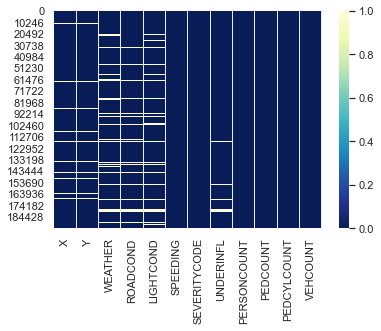

In [117]:
sns.heatmap(data_clean.isnull(), cmap='YlGnBu_r')
plt.show()

We now drop the records having null values in order to clean the data.

In [118]:
data_clean.dropna(axis=0, inplace=True)

Visualizing the dataset after dropping the null values shows that there are no more blanks.

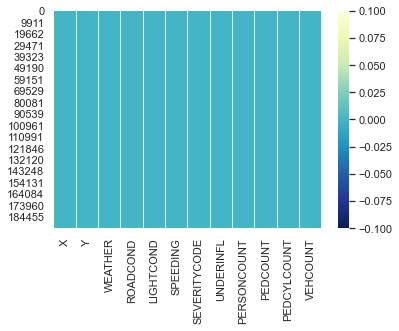

In [119]:
sns.heatmap(data_clean.isnull(), cmap='YlGnBu_r')
plt.show()

As the `UNDERINFL` field had data inconsistency, it is cleaned by converting all `N` and `0` values to `0` and all `Y` and `1` values to `1`.

In [120]:
data_clean['UNDERINFL'] = data_clean['UNDERINFL'].map({'N': 0, '0': 0, 'Y': 1, '1': 1})

In [121]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166217 entries, 0 to 194672
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   X             166217 non-null  float64
 1   Y             166217 non-null  float64
 2   WEATHER       166217 non-null  object 
 3   ROADCOND      166217 non-null  object 
 4   LIGHTCOND     166217 non-null  object 
 5   SPEEDING      166217 non-null  float64
 6   SEVERITYCODE  166217 non-null  int64  
 7   UNDERINFL     166217 non-null  int64  
 8   PERSONCOUNT   166217 non-null  int64  
 9   PEDCOUNT      166217 non-null  int64  
 10  PEDCYLCOUNT   166217 non-null  int64  
 11  VEHCOUNT      166217 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 16.5+ MB


Before encoding the values of the categorical fields, we take a look at their distribution.

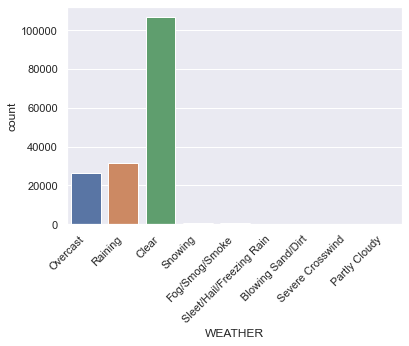

In [122]:
ax = sns.countplot(data_clean['WEATHER'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

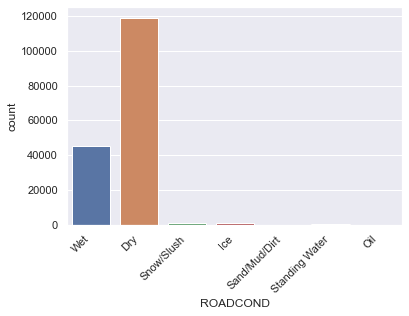

In [123]:
ax = sns.countplot(data_clean['ROADCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

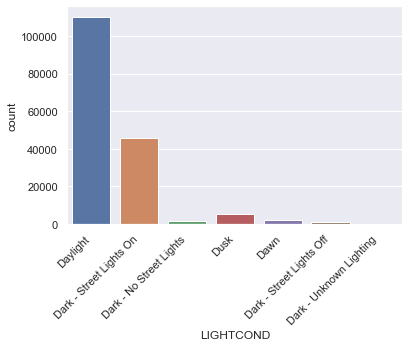

In [124]:
ax = sns.countplot(data_clean['LIGHTCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

<AxesSubplot:xlabel='UNDERINFL', ylabel='count'>

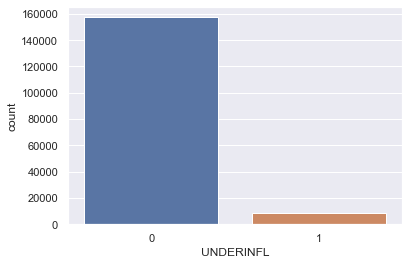

In [125]:
sns.countplot(data_clean['UNDERINFL'])

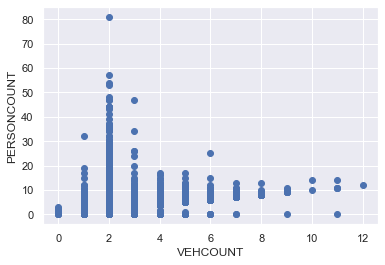

In [126]:
ax = plt.scatter(data_clean['VEHCOUNT'], data_clean['PERSONCOUNT'])
plt.xlabel('VEHCOUNT')
plt.ylabel('PERSONCOUNT')
plt.show()

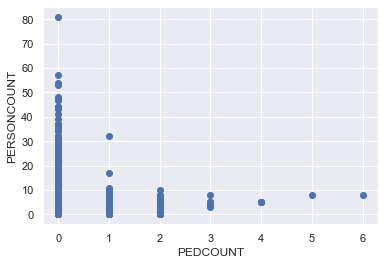

In [127]:
ax = plt.scatter(data_clean['PEDCOUNT'], data_clean['PERSONCOUNT'])
plt.xlabel('PEDCOUNT')
plt.ylabel('PERSONCOUNT')
plt.show()

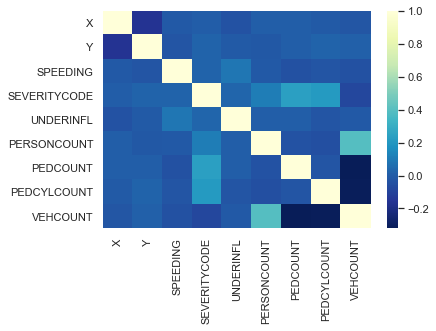

In [128]:
sns.heatmap(data_clean.corr(), cmap='YlGnBu_r')
plt.show()

We now do an one-hot encoding of the `WEATHER`, `ROADCOND`, and `LIGHTCOND` fields as they are categorical.

In [129]:
data_clean = pd.concat([data_clean.drop(['WEATHER', 'ROADCOND', 'LIGHTCOND'], axis=1), 
           pd.get_dummies(data_clean['ROADCOND']),
           pd.get_dummies(data_clean['LIGHTCOND']),
           pd.get_dummies(data_clean['WEATHER'])], axis=1)

Shuffling of the dataset is necessary as it is an unbalanced dataset.

In [130]:
data_clean = data_clean.sample(frac=1).reset_index(drop=True)

In [131]:
data_clean.head(5).T

,0,1,2,3,4
X,-122.338651,-122.335076,-122.373032,-122.337829,-122.344685
Y,47.607332,47.691401,47.542844,47.554976,47.704327
SPEEDING,0.000000,0.000000,0.000000,0.000000,0.000000
SEVERITYCODE,1.000000,1.000000,1.000000,2.000000,1.000000
UNDERINFL,0.000000,0.000000,0.000000,0.000000,0.000000
PERSONCOUNT,3.000000,5.000000,2.000000,0.000000,4.000000
PEDCOUNT,0.000000,0.000000,0.000000,0.000000,0.000000
PEDCYLCOUNT,0.000000,0.000000,0.000000,0.000000,0.000000
VEHCOUNT,2.000000,2.000000,2.000000,2.000000,2.000000
Dry,1.000000,1.000000,1.000000,0.000000,1.000000


Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. Finding the correlation among the features of the dataset helps understand the data better. For example, in the heatmap shown below, it can be observed that some features have a strong positive / negative correlation while most of them have weak / no correlation.

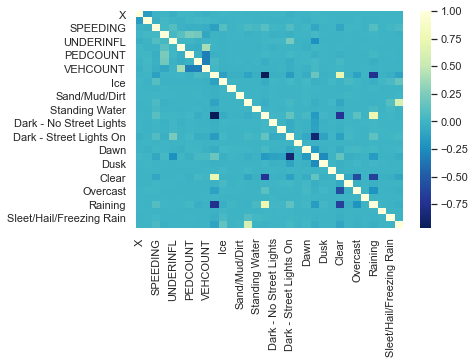

In [132]:
sns.heatmap(data_clean.corr(), cmap='YlGnBu_r')
plt.show()

The datasets `x` and `y` are constructed. The set `x` contains all the training examples and `y` contains all the labels. Feature scaling of data is done to normalize the data in a dataset to a specific range.

After normalization, they are split into `x_train`, `y_train`, `x_test`, and `y_test`. The first two sets sahll be used for training and the last two shall be used for testing. Upon choosing a suitable split ratio, 80% of data is used for training and 20% of is used for testing.

In [133]:
from sklearn import preprocessing
x = data_clean.drop(['SEVERITYCODE'], axis=1)
y = data_clean[['SEVERITYCODE']]
data_clean_scaled = preprocessing.StandardScaler().fit(x).transform(x)
data_clean_scaled[0:3]

array([[-0.27884472, -0.2048837 , -0.23209324, -0.23564163,  0.34634267,
        -0.19793337, -0.17999808,  0.04587593,  0.62835028, -0.07992289,
        -0.01717214, -0.01835817, -0.07045456, -0.02378751, -0.60905854,
        -0.08991369, -0.08053056, -0.61505783, -0.00693774, -0.11941706,
         0.71186295, -0.18554678, -0.01589797,  0.74635028, -0.05693143,
        -0.43432673, -0.00548471, -0.48411165, -0.01201709, -0.02526119,
        -0.07010876],
       [-0.15891702,  1.27859946, -0.23209324, -0.23564163,  1.76432708,
        -0.19793337, -0.17999808,  0.04587593,  0.62835028, -0.07992289,
        -0.01717214, -0.01835817, -0.07045456, -0.02378751, -0.60905854,
        -0.08991369, -0.08053056,  1.62586339, -0.00693774, -0.11941706,
        -1.40476479, -0.18554678, -0.01589797,  0.74635028, -0.05693143,
        -0.43432673, -0.00548471, -0.48411165, -0.01201709, -0.02526119,
        -0.07010876],
       [-1.43204777, -1.34282207, -0.23209324, -0.23564163, -0.36264953,
       

In [134]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_clean_scaled, y, 
                                                    test_size=0.2, random_state=42)

### Modelling and Evaluation

Decision Tree makes decision with tree-like model. It splits the sample into two or more homogenous sets (leaves) based on the most significant differentiators in the input variables. To choose a differentiator (predictor), the algorithm considers all features and does a binary split on them (for categorical data, split by category; for continuous, pick a cut-off threshold). It will then choose the one with the least cost (i.e. highest accuracy), and repeats recursively, until it successfully splits the data in all leaves (or reaches the maximum depth).

Information gain for a decision tree classifier can be calculated either using the Gini Index measure or the Entropy measure, whichever gives a greater gain. A hyper parameter Decision Tree Classifier was used to decide which tree to use, DTC using entropy had greater information gain; hence it was used for this classification problem.

In [135]:
from sklearn.tree import DecisionTreeClassifier
dTreeModel = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dTreeModel.fit(x_train, y_train)
dTreeModel

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [136]:
yHat = dTreeModel.predict(x_test)

In [137]:
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       0.72      0.95      0.82     22209
           2       0.74      0.27      0.39     11035

    accuracy                           0.73     33244
   macro avg       0.73      0.61      0.61     33244
weighted avg       0.73      0.73      0.68     33244



Random Forest Classifier is an ensemble (algorithms which combines more than one algorithms of same or different kind for classifying objects) tree-based learning algorithm. RFC is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object. Used for both classification and regression.

Similar to DTC, RFT requires an input that specifies a measure that is to be used for classification, along with that a value for the number of estimators (number of decision trees) is required. A hyper parameter RFT was used to determine the best choices for the above mentioned parameters. RFT with 75 DT’s using entropy as the measure gave the best accuracy when trained and tested on pre-processed accident severity dataset.

In [138]:
from sklearn.ensemble import RandomForestClassifier
rfcModel = RandomForestClassifier(n_estimators=75)
rfcModel.fit(x_train, y_train)

RandomForestClassifier(n_estimators=75)

In [139]:
yHat = rfcModel.predict(x_test)

In [140]:
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       0.74      0.81      0.77     22209
           2       0.52      0.41      0.46     11035

    accuracy                           0.68     33244
   macro avg       0.63      0.61      0.62     33244
weighted avg       0.66      0.68      0.67     33244



Logistic Regression is a classifier that estimates discrete values (binary values like 0/1, yes/no, true/false) based on a given set of an independent variables. It basically predicts the probability of occurrence of an event by fitting data to a logistic function. Hence it is also known as logistic regression. The values obtained would always lie within 0 and 1 since it predicts the probability.

The chosen dataset has more than two target categories in terms of the accident severity code assigned, one-vs-one (OvO) strategy is employed.

In [141]:
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression(C=0.01)
logRegModel.fit(x_train, y_train)
logRegModel

LogisticRegression(C=0.01)

In [142]:
yHat = logRegModel.predict(x_test)

In [143]:
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       0.72      0.98      0.83     22209
           2       0.82      0.22      0.35     11035

    accuracy                           0.73     33244
   macro avg       0.77      0.60      0.59     33244
weighted avg       0.75      0.73      0.67     33244



Neural networks can be used to capture non-linearity between features. We have used a Sequential ANN where there are 2 hidden layers. The `relu` and `sigmoid` activation functions are used. The loss function that is used is `categorical_crossentropy` as the target is integer-coded.

### Results

The accuracies of all models lied was 100% which means we can accurately predict the severity of an accident. A bar plot is plotted below with the bars representing the accuracy of each model.

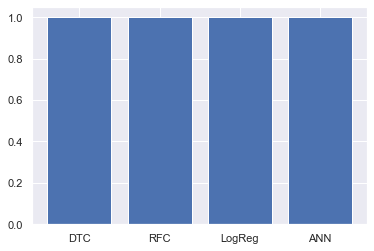

In [149]:
plt.bar(['DTC', 'RFC', 'LogReg', 'ANN'], [1.,1.,1.,1.])
plt.show()

### Conclusion

Initially, the classifiers had an prediction accuracy of 66%-71%, however, upon going back to the data preparation phase, minor tweaking and taking additional fields in the dataset improved the overall accuracy of all models.

The accuracy of the classifiers is excellent, i.e. 100%. This means that the model has trained well and fits the training data and performs well on the testing set as well as the training set. We can conclude that this model can accurately predict the severity of car accidents in Seattle.

### Future Work

The trained model can be deployed onto governance and monitoring web and mobile applications to predict the accident severity for a given set of parameters.